### pymatgen surface 模块

In [9]:
from pymatgen.io.ase import AseAtomsAdaptor
from ase.visualize.plot import plot_atoms
from pymatgen.core.structure import Structure
from ase.atoms import Atoms


def visualize_structure(structure: Structure):
    """用 ase visualize 模块可视化原子构型"""

    atoms: Atoms = AseAtomsAdaptor.get_atoms(structure)

    plot_atoms(
        atoms,
        radii=0.3,  # 原子半径
        rotation="90x,90y",  # 视角；展现 z 轴
    )

生成特定miller_index的表面

In [13]:
from pymatgen.core.structure import Structure
from pymatgen.core.surface import SlabGenerator


copper = Structure.from_prototype("fcc", ["Cu"], a=3.62)

slabgen = SlabGenerator(
    initial_structure=copper,  # 初始输入结构，需为 conventional unit cell
    miller_index=(1, 1, 1),    # 平行于表面平面的晶面 miller 指数
    min_slab_size=10,
    min_vacuum_size=10,
    # center_slab=True,  # 是否将 slab 原子置于 cell 中心，上下真空层相等
    center_slab=False,
    # in_unit_planes=True,   # 设置 min_slab_size 和 min_vacuum_size 参数的单位，False 为 整体 slab 模型的最小厚度 Angstrom，True 为 slab 层数
)

slabs = slabgen.get_slabs()

In [2]:
slabs

[Structure Summary
 Lattice
     abc : 2.559726547895302 2.5597265478953024 20.95226479405031
  angles : 86.49792301094558 86.49792301094558 59.99999999999999
  volume : 118.59482000000001
       A : 2.5549464754740585 0.0 0.1563601850302269
       B : 1.2726886937754676 2.2154040221308184 0.1563601850302269
       C : 0.0 0.0 20.95226479405031
     pbc : True True True
 PeriodicSite: Cu (2.488, 1.44, 1.251) [0.65, 0.65, 0.05]
 PeriodicSite: Cu (3.636, 2.105, 3.44) [0.95, 0.95, 0.15]
 PeriodicSite: Cu (0.9569, 0.5539, 5.316) [0.25, 0.25, 0.25]
 PeriodicSite: Cu (2.105, 1.218, 7.505) [0.55, 0.55, 0.35]
 PeriodicSite: Cu (3.253, 1.883, 9.694) [0.85, 0.85, 0.45]]

In [3]:
type(slabs)

list

In [4]:
slabs[0]

Structure Summary
Lattice
    abc : 2.559726547895302 2.5597265478953024 20.95226479405031
 angles : 86.49792301094558 86.49792301094558 59.99999999999999
 volume : 118.59482000000001
      A : 2.5549464754740585 0.0 0.1563601850302269
      B : 1.2726886937754676 2.2154040221308184 0.1563601850302269
      C : 0.0 0.0 20.95226479405031
    pbc : True True True
PeriodicSite: Cu (2.488, 1.44, 1.251) [0.65, 0.65, 0.05]
PeriodicSite: Cu (3.636, 2.105, 3.44) [0.95, 0.95, 0.15]
PeriodicSite: Cu (0.9569, 0.5539, 5.316) [0.25, 0.25, 0.25]
PeriodicSite: Cu (2.105, 1.218, 7.505) [0.55, 0.55, 0.35]
PeriodicSite: Cu (3.253, 1.883, 9.694) [0.85, 0.85, 0.45]

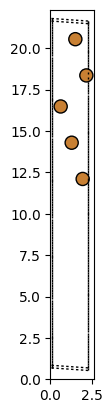

In [14]:
visualize_structure(slabs[0])

居中与不居中 cell 示意图：

In [9]:
Cu_111 = slabs[0]

print(Cu_111.miller_index, Cu_111.shift)

(1, 1, 1) 0.5


In [10]:
slabgen = SlabGenerator(
    initial_structure=copper,
    miller_index=(1, 1, 1),
    min_slab_size=10,
    min_vacuum_size=10,
    center_slab=True,
)

slabs = slabgen.get_slabs()
slabs

[Structure Summary
 Lattice
     abc : 2.559726547895302 2.5597265478953024 20.95226479405031
  angles : 86.49792301094558 86.49792301094558 59.99999999999999
  volume : 118.59482000000001
       A : 2.5549464754740585 0.0 0.1563601850302269
       B : 1.2726886937754676 2.2154040221308184 0.1563601850302269
       C : 0.0 0.0 20.95226479405031
     pbc : True True True
 PeriodicSite: Cu (3.445, 1.994, 6.567) [0.9, 0.9, 0.3]
 PeriodicSite: Cu (0.7655, 0.4431, 8.443) [0.2, 0.2, 0.4]
 PeriodicSite: Cu (1.914, 1.108, 10.63) [0.5, 0.5, 0.5]
 PeriodicSite: Cu (3.062, 1.772, 12.82) [0.8, 0.8, 0.6]
 PeriodicSite: Cu (0.3828, 0.2215, 14.7) [0.1, 0.1, 0.7]]

In [11]:
Cu_111 = slabs[0]

print(Cu_111.miller_index, Cu_111.shift)

(1, 1, 1) 0.5


In [19]:
from pymatgen.analysis.adsorption import plot_slab
from matplotlib import pyplot as plt

%matplotlib inline

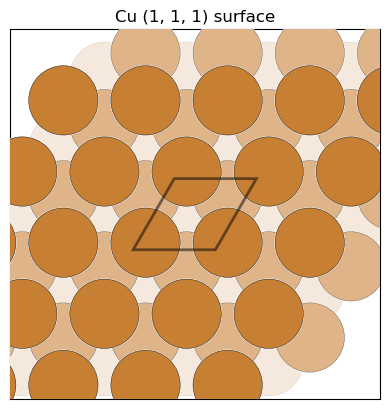

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_slab(Cu_111, ax, adsorption_sites=False)
ax.set_title("Cu (1, 1, 1) surface")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

生成最大milier_index数值的所有表面

In [22]:
from pymatgen.core.surface import generate_all_slabs


all_slabs = generate_all_slabs(copper, 1, 10, 10)
print(len(all_slabs))

3


In [26]:
for slab in all_slabs:
    print(slab.miller_index, slab.shift)

(1, 1, 1) 0.5
(1, 1, 0) 0.25
(1, 0, 0) 0.25


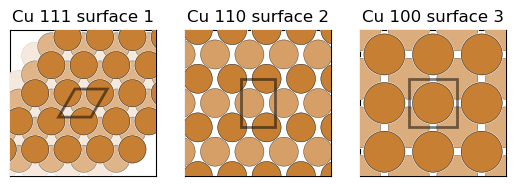

In [28]:
fig = plt.figure()
for n, slab in enumerate(all_slabs):
    miller_index_cha = [str(i) for i in slab.miller_index]
    ax = fig.add_subplot(1, len(all_slabs), n+1)
    plot_slab(slab, ax, adsorption_sites=False)
    ax.set_title(f"Cu {''.join(miller_index_cha)} surface {n+1}")
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

寻找表面的吸附位点

In [10]:
from pymatgen.analysis.adsorption import AdsorbateSiteFinder


asf = AdsorbateSiteFinder(Cu_111)

ads_sites = asf.find_adsorption_sites()
print(ads_sites)

{'ontop': [array([ 0.26067036,  0.15087388, 16.69287607])], 'bridge': [array([ 1.53814359,  0.15087388, 16.77105616])], 'hollow': [array([ 1.53654875,  0.88934188, 16.79711619]), array([ 2.81242714,  1.62780989, 16.90135631])], 'all': [array([ 0.26067036,  0.15087388, 16.69287607]), array([ 1.53814359,  0.15087388, 16.77105616]), array([ 1.53654875,  0.88934188, 16.79711619]), array([ 2.81242714,  1.62780989, 16.90135631])]}


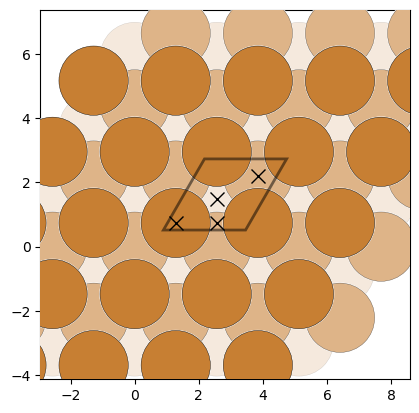

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_slab(Cu_111, ax, adsorption_sites=True)
plt.show()

在吸附位点添加吸附分子

In [12]:
from pymatgen.core.structure import Molecule


adsorbate = Molecule("H", [[0, 0, 0]])

ads_structs = asf.generate_adsorption_structures(adsorbate, repeat=[1, 1, 1], find_args={"distance": 1.6})

/home/yangsl/bin/miniconda3/lib/python3.9/site-packages/pymatgen/core/structure.py:952: UserWarning: Not all sites have property bulk_wyckoff. Missing values are set to None.
  warnings.warn(f"Not all sites have property {key}. Missing values are set to None.")
/home/yangsl/bin/miniconda3/lib/python3.9/site-packages/pymatgen/core/structure.py:952: UserWarning: Not all sites have property bulk_equivalent. Missing values are set to None.
  warnings.warn(f"Not all sites have property {key}. Missing values are set to None.")


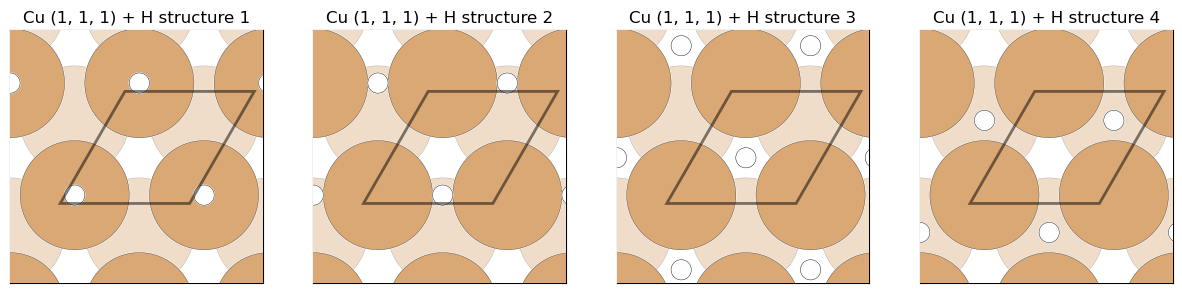

In [13]:
fig = plt.figure(figsize=[15, 60])
for n, ads_struct in enumerate(ads_structs):
    ax = fig.add_subplot(1, 4, n+1)
    plot_slab(ads_struct, ax, adsorption_sites=False)
    ax.set_title("Cu (1, 1, 1) + H structure %i" %(n+1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0,5)
    ax.set_ylim(-1,4)
plt.show()